In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import *
from local.lib import mlutils
tf.__version__

'2.1.0'

## Observe the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

in [`tensorflow.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) you can find some example datasets

In [2]:
from tensorflow.keras import datasets

In [3]:
(Xtr, ytr), (Xts, yts) = datasets.cifar10.load_data()

Xtr = Xtr/255
Xts = Xts/255
Xtr.shape, ytr.shape, Xts.shape, yts.shape


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
cnames = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "boat", "truck"]

### Asuminos que obtenemos informaicón extra de cada objeto: 
- si es un ser vivo o no
- si vuela o no

In [5]:
living = [2,3,4,5,6,7]

In [6]:
xtr_liv = np.r_[[i in living for i in ytr]].astype(float).reshape(-1,1)
xts_liv = np.r_[[i in living for i in yts]].astype(float).reshape(-1,1)
print ("pct imgs with living creatures in train %.2f"%np.mean(xtr_liv))
print ("pct imgs with living creatures in test  %.2f"%np.mean(xts_liv))


pct imgs with living creatures in train 0.60
pct imgs with living creatures in test  0.60


In [7]:
flies = [0,2]
xtr_fly = np.r_[[i in flies for i in ytr]].astype(float).reshape(-1,1)
xts_fly = np.r_[[i in flies for i in yts]].astype(float).reshape(-1,1)
print ("pct imgs with flying objects in train %.2f"%np.mean(xtr_fly))
print ("pct imgs with flying objects in test  %.2f"%np.mean(xts_fly))

pct imgs with flying objects in train 0.20
pct imgs with flying objects in test  0.20


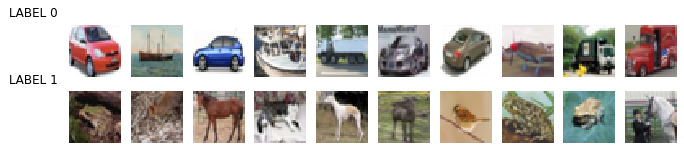

In [27]:
mlutils.show_labeled_image_mosaic(Xtr, xtr_liv[:,0])

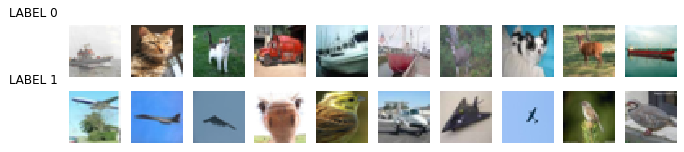

In [9]:
mlutils.show_labeled_image_mosaic(Xtr, xtr_fly[:,0])

### Construye una red multimodal que acepte TRES fuentes de datos

- las imágenes
- la información binaria sobre si es una creatura viviente o no
- la información binaria sobre si vuela o no

In [ ]:

model = ....

model.compile(optimizer="adam",
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
# uncomment this code to see the solution

#sol = [10, 105, 110, 112, 117, 116, 115, 95, 105, 109, 103, 32, 32, 61, 32, 116, 102, 46, 107, 101, 114, 97, 115, 46, 108, 97, 121, 101, 114, 115, 46, 73, 110, 112, 117, 116, 40, 115, 104, 97, 112, 101, 61, 88, 116, 114, 46, 115, 104, 97, 112, 101, 91, 49, 58, 93, 44, 32, 110, 97, 109, 101, 61, 34, 105, 110, 112, 117, 116, 95, 105, 109, 103, 115, 34, 41, 10, 105, 110, 112, 117, 116, 115, 95, 108, 105, 118, 32, 32, 61, 32, 116, 102, 46, 107, 101, 114, 97, 115, 46, 108, 97, 121, 101, 114, 115, 46, 73, 110, 112, 117, 116, 40, 115, 104, 97, 112, 101, 61, 91, 49, 93, 44, 32, 110, 97, 109, 101, 61, 34, 105, 110, 112, 117, 116, 95, 108, 105, 118, 34, 41, 10, 105, 110, 112, 117, 116, 115, 95, 102, 108, 121, 32, 32, 61, 32, 116, 102, 46, 107, 101, 114, 97, 115, 46, 108, 97, 121, 101, 114, 115, 46, 73, 110, 112, 117, 116, 40, 115, 104, 97, 112, 101, 61, 91, 49, 93, 44, 32, 110, 97, 109, 101, 61, 34, 105, 110, 112, 117, 116, 95, 102, 108, 121, 34, 41, 10, 108, 97, 121, 101, 114, 49, 32, 32, 32, 61, 32, 116, 102, 46, 107, 101, 114, 97, 115, 46, 108, 97, 121, 101, 114, 115, 46, 70, 108, 97, 116, 116, 101, 110, 40, 110, 97, 109, 101, 61, 34, 102, 108, 97, 116, 116, 101, 110, 95, 105, 109, 103, 34, 41, 40, 105, 110, 112, 117, 116, 115, 95, 105, 109, 103, 41, 10, 108, 97, 121, 101, 114, 49, 32, 32, 32, 61, 32, 116, 102, 46, 107, 101, 114, 97, 115, 46, 108, 97, 121, 101, 114, 115, 46, 68, 101, 110, 115, 101, 40, 49, 48, 48, 44, 32, 97, 99, 116, 105, 118, 97, 116, 105, 111, 110, 61, 34, 114, 101, 108, 117, 34, 44, 32, 110, 97, 109, 101, 61, 34, 108, 97, 121, 101, 114, 49, 95, 105, 109, 103, 115, 34, 41, 40, 108, 97, 121, 101, 114, 49, 41, 10, 10, 108, 97, 121, 101, 114, 32, 61, 32, 116, 102, 46, 99, 111, 110, 99, 97, 116, 40, 91, 108, 97, 121, 101, 114, 49, 44, 32, 105, 110, 112, 117, 116, 115, 95, 108, 105, 118, 44, 32, 105, 110, 112, 117, 116, 115, 95, 102, 108, 121, 93, 44, 32, 97, 120, 105, 115, 61, 49, 41, 10, 108, 97, 121, 101, 114, 32, 32, 32, 61, 32, 116, 102, 46, 107, 101, 114, 97, 115, 46, 108, 97, 121, 101, 114, 115, 46, 68, 101, 110, 115, 101, 40, 49, 48, 44, 32, 97, 99, 116, 105, 118, 97, 116, 105, 111, 110, 61, 34, 114, 101, 108, 117, 34, 41, 40, 108, 97, 121, 101, 114, 41, 10, 111, 117, 116, 112, 117, 116, 115, 32, 61, 32, 116, 102, 46, 107, 101, 114, 97, 115, 46, 108, 97, 121, 101, 114, 115, 46, 68, 101, 110, 115, 101, 40, 49, 48, 44, 32, 97, 99, 116, 105, 118, 97, 116, 105, 111, 110, 61, 34, 115, 105, 103, 109, 111, 105, 100, 34, 41, 40, 108, 97, 121, 101, 114, 41, 10, 10, 109, 111, 100, 101, 108, 32, 61, 32, 116, 102, 46, 107, 101, 114, 97, 115, 46, 77, 111, 100, 101, 108, 40, 105, 110, 112, 117, 116, 115, 61, 91, 105, 110, 112, 117, 116, 115, 95, 105, 109, 103, 44, 32, 105, 110, 112, 117, 116, 115, 95, 108, 105, 118, 44, 32, 105, 110, 112, 117, 116, 115, 95, 102, 108, 121, 93, 44, 32, 111, 117, 116, 112, 117, 116, 115, 61, 111, 117, 116, 112, 117, 116, 115, 41, 10, 10, 109, 111, 100, 101, 108, 46, 99, 111, 109, 112, 105, 108, 101, 40, 111, 112, 116, 105, 109, 105, 122, 101, 114, 61, 34, 97, 100, 97, 109, 34, 44, 10, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 108, 111, 115, 115, 61, 116, 102, 46, 107, 101, 114, 97, 115, 46, 108, 111, 115, 115, 101, 115, 46, 115, 112, 97, 114, 115, 101, 95, 99, 97, 116, 101, 103, 111, 114, 105, 99, 97, 108, 95, 99, 114, 111, 115, 115, 101, 110, 116, 114, 111, 112, 121, 44, 10, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 109, 101, 116, 114, 105, 99, 115, 61, 91, 39, 97, 99, 99, 117, 114, 97, 99, 121, 39, 93, 41, 10]
#print ("".join([chr(i) for i in sol]))

In [ ]:
model.summary()

### construye la llamada al método `.fit` de esta nueva red

In [ ]:
model.fit(...)

In [ ]:
# uncomment this code to see the solution

#sol=[10, 109, 111, 100, 101, 108, 46, 102, 105, 116, 40, 91, 88, 116, 114, 44, 32, 120, 116, 114, 95, 108, 105, 118, 44, 32, 120, 116, 114, 95, 102, 108, 121, 93, 44, 32, 121, 116, 114, 44, 32, 101, 112, 111, 99, 104, 115, 61, 49, 48, 44, 10, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 118, 97, 108, 105, 100, 97, 116, 105, 111, 110, 95, 100, 97, 116, 97, 61, 40, 91, 88, 116, 115, 44, 32, 120, 116, 115, 95, 108, 105, 118, 44, 32, 120, 116, 115, 95, 102, 108, 121, 93, 44, 32, 121, 116, 115, 41, 41, 10]
#print ("".join([chr(i) for i in sol]))


que mejoró en la clasificación?

### construye la llamada al modelo para obtener las probabilidades de predicción

In [ ]:
probs_ts = ...
preds_ts = np.argmax(probs_ts, axis=1)
mlutils.print_confusion_matrix(yts, preds_ts, class_names=cnames);

In [ ]:
# uncomment this code to see the solution

#sol = [10, 112, 114, 111, 98, 115, 95, 116, 115, 32, 61, 32, 109, 111, 100, 101, 108, 40, 91, 88, 116, 115, 44, 32, 120, 116, 115, 95, 108, 105, 118, 44, 32, 120, 116, 115, 95, 102, 108, 121, 93, 41, 46, 110, 117, 109, 112, 121, 40, 41, 10, 112, 114, 101, 100, 115, 95, 116, 115, 32, 61, 32, 110, 112, 46, 97, 114, 103, 109, 97, 120, 40, 112, 114, 111, 98, 115, 95, 116, 115, 44, 32, 97, 120, 105, 115, 61, 49, 41, 10, 109, 108, 117, 116, 105, 108, 115, 46, 112, 114, 105, 110, 116, 95, 99, 111, 110, 102, 117, 115, 105, 111, 110, 95, 109, 97, 116, 114, 105, 120, 40, 121, 116, 115, 44, 32, 112, 114, 101, 100, 115, 95, 116, 115, 44, 32, 99, 108, 97, 115, 115, 95, 110, 97, 109, 101, 115, 61, 99, 110, 97, 109, 101, 115, 41, 59, 10]
#print ("".join([chr(i) for i in sol]))